# Proyek Akhir: Menyelesaikan Permasalahan Student's Performance

*   Nama        : Ridhan Al Aufar
*   Email       : ridhan783@gmail.com
*   Id Dicoding : ridhann_4


### 📚 IMPORT LIBRARY
Import pustaka-pustaka penting yang digunakan dalam proses analisis data dan pembuatan model machine learning.

In [1]:
# Mengimpor semua library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from joblib import dump

### 📥 LOAD DATA
Memuat dataset dari file CSV dan menyimpannya dalam DataFrame untuk proses selanjutnya.

In [2]:
# Load Data
df = pd.read_csv('/content/data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### 👀 DATA UNDERSTANDING
Melihat bentuk awal data, jumlah kolom dan baris, serta tipe datanya untuk memahami struktur dataset.

In [3]:
# Menampilkan ringkasan struktur DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
# Menampilkan statistik deskriptif untuk semua kolom dalam DataFrame
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### EDA

#### 🧪 EDA UNIVARIATE
Melakukan eksplorasi data secara univariat, yakni menganalisis satu variabel dalam satu waktu untuk memahami distribusinya.

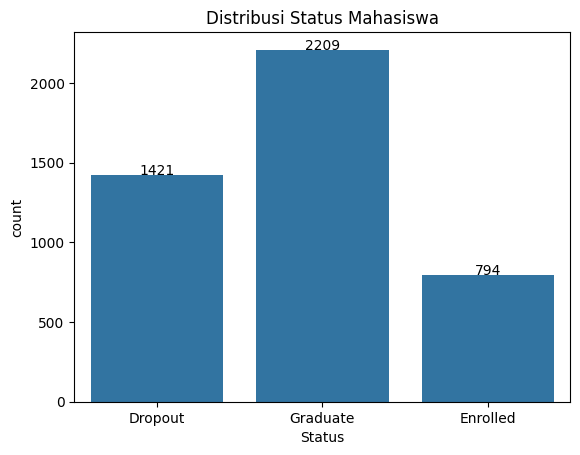

In [5]:
# Distribusi Status Mahasiswa
ax = sns.countplot(data=df, x='Status')
plt.title('Distribusi Status Mahasiswa')

# Menambahkan label jumlah di atas setiap batang
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., count + 0.5, count, ha='center')

# Menampilkan plot
plt.show()

#### 📊 EDA NUMERIKAL
Menampilkan histogram untuk semua fitur numerikal agar dapat melihat pola distribusi dan kemungkinan outlier.

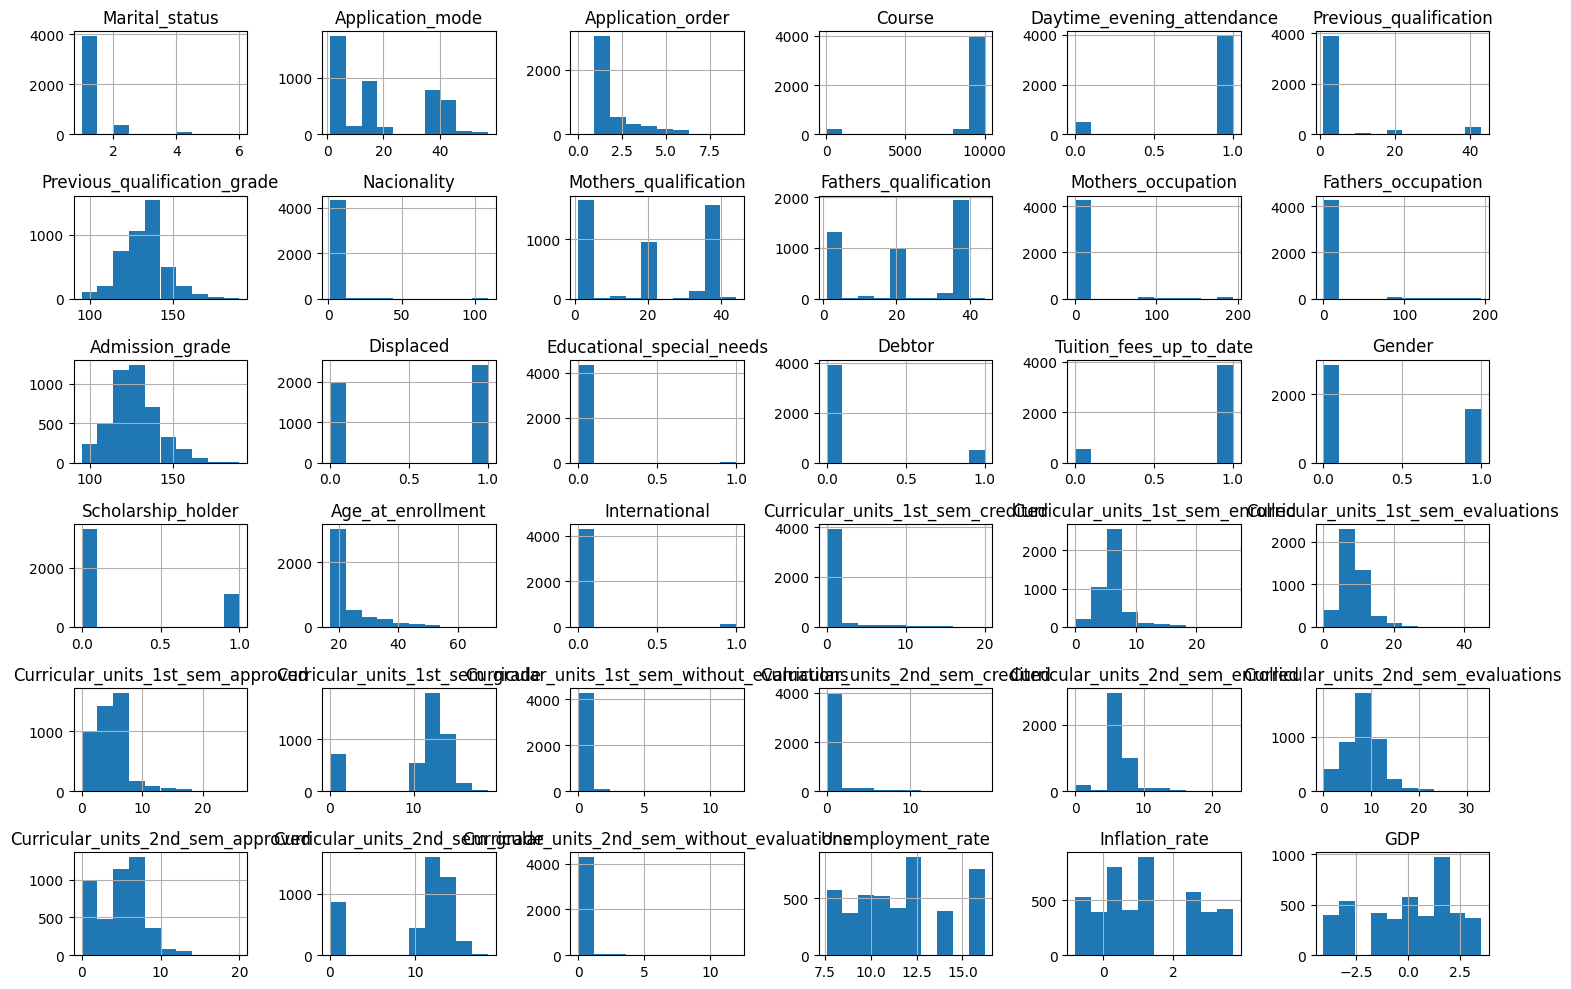

In [6]:
# Histogram untuk Kolom Numerik
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

#### 📊 EDA KATEGORIKAL

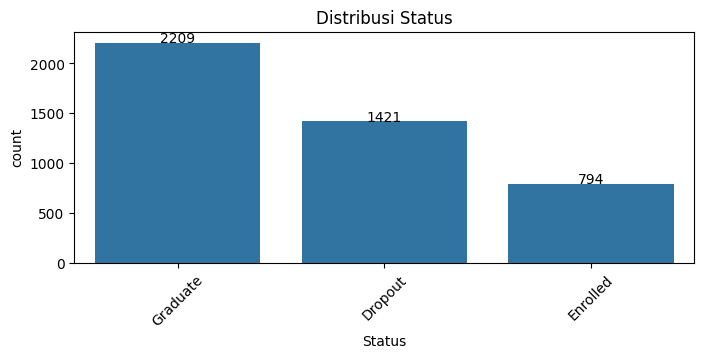

In [7]:
# Visualisasi Distribusi Kolom Kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 3))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)

    # Menambahkan label jumlah di atas setiap batang
    for p in ax.patches:
        count = int(p.get_height())
        ax.text(p.get_x() + p.get_width() / 2., count + 0.5, count, ha='center')

    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
    plt.show()


### 🧼 DATA PREPROCESSING
Melakukan encoding data kategorikal, membagi data menjadi fitur dan target, serta persiapan data untuk model.

In [8]:
# Mapping nilai Status ke angka
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['Status'] = df['Status'].map(status_mapping)

In [9]:
# Pisahkan Data Training dan Prediksi

# Buat salinan untuk menjaga keutuhan data asli
df_copy = df.copy()

# Data training: hanya mahasiswa yang sudah dropout atau lulus
df_train = df_copy[df_copy['Status'].isin([0, 2])].copy()

# Data yang akan diprediksi: mahasiswa yang masih enrolled
df_enrolled = df_copy[df_copy['Status'] == 1].copy()

# Encode label target: 0 = Dropout, 1 = Graduate
df_train['Status_binary'] = df_train['Status'].map({0: 0, 2: 1})

In [10]:
# Pisahkan Fitur dan Label
X = df_train.drop(columns=['Status', 'Status_binary'])
y = df_train['Status_binary']

# Untuk prediksi nanti
X_enrolled = df_enrolled.drop(columns=['Status'])

#### 🔢 Feature Scaling
Melakukan normalisasi/standarisasi fitur numerik agar semua fitur memiliki skala yang seragam.

In [11]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_enrolled_scaled = scaler.transform(X_enrolled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

#### ⚖️ OVERSAMPLING
Menggunakan teknik oversampling (SMOTE) untuk mengatasi ketidakseimbangan jumlah sampel antar kelas target.

In [12]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### 🤖 MODELLING (Random Forest)
Melatih model Random Forest untuk memprediksi label target berdasarkan fitur yang sudah disiapkan.

In [13]:
# Definisikan grid hyperparameter
param_grid = {
    'n_estimators': [100, 200],            # Jumlah pohon
    'max_depth': [10, 20, None],           # Kedalaman maksimal pohon
    'min_samples_split': [2, 5],           # Minimum data untuk split
    'min_samples_leaf': [1, 2],            # Minimum data di daun
    'max_features': ['sqrt', 'log2']       # Fitur untuk split
}

# Inisialisasi Random Forest
model = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Fit model ke data hasil oversampling
grid_search.fit(X_train_resampled, y_train_resampled)

# Gunakan model terbaik
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


### 🧪 EVALUASI MODEL
Mengevaluasi performa model menggunakan metrik seperti precision, recall, f1-score dan accuracy.

In [14]:
# Prediksi dan evaluasi
y_pred = best_model.predict(X_test)

In [15]:
# Menampilkan hasil evaluasi
print("Best Parameters:\n", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters:
 {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       426
           1       0.89      0.96      0.93       663

    accuracy                           0.91      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089



In [16]:
# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

Accuracy Score: 0.9063


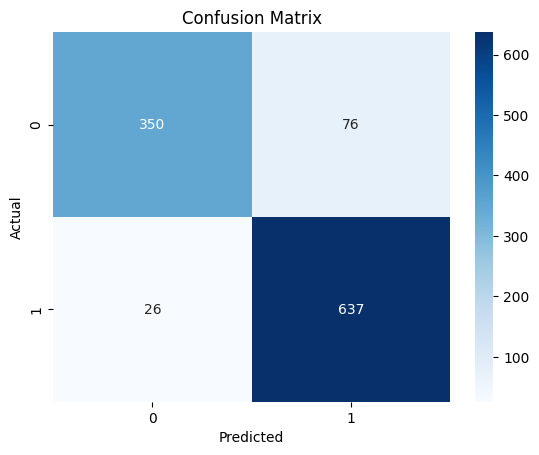

In [17]:
# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Simpan model ke file
dump(best_model, 'model_students-performance-36features.joblib')

['model_students-performance-36features.joblib']

### 🧠 FEATURE IMPORTANCE
Menampilkan fitur-fitur terpenting yang paling berpengaruh terhadap prediksi model berdasarkan feature importance dari Random Forest.



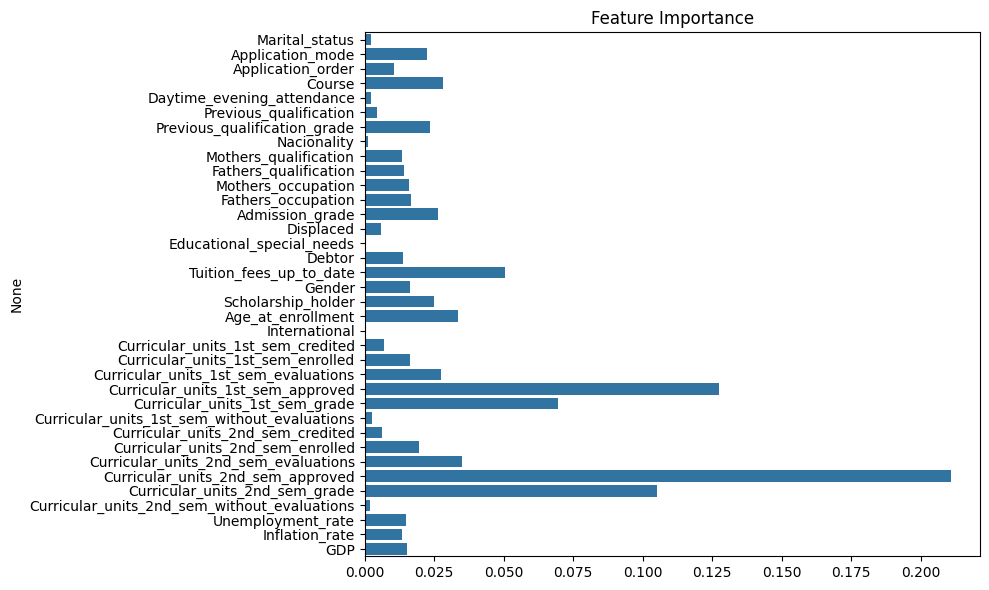

In [19]:
# Visualisasi Feature Importance
feat_importance = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

#### TOP 20 FEATURES

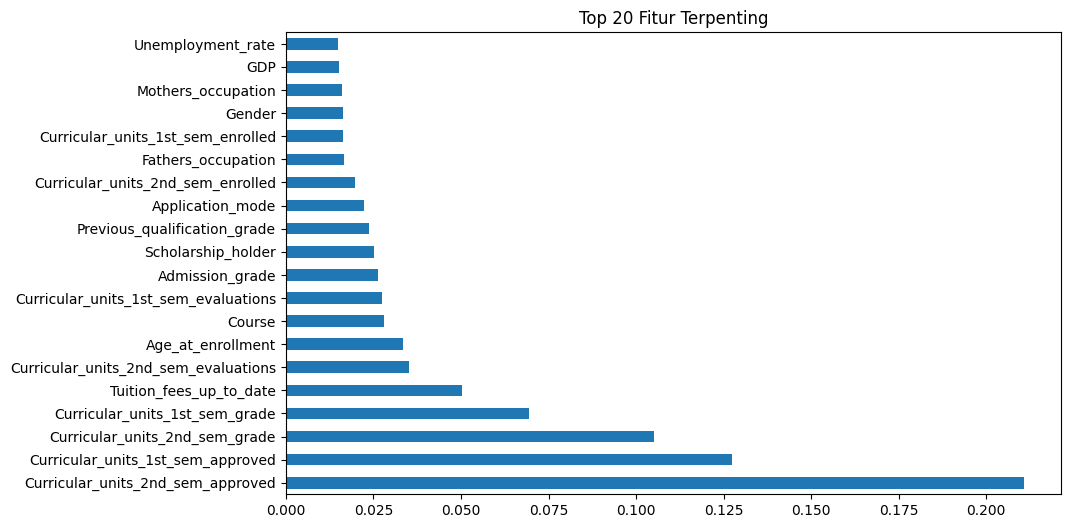

In [20]:
# Visualisasi 20 Fitur Terpenting dalam Model
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(10,6))
plt.title("Top 20 Fitur Terpenting")
plt.show()

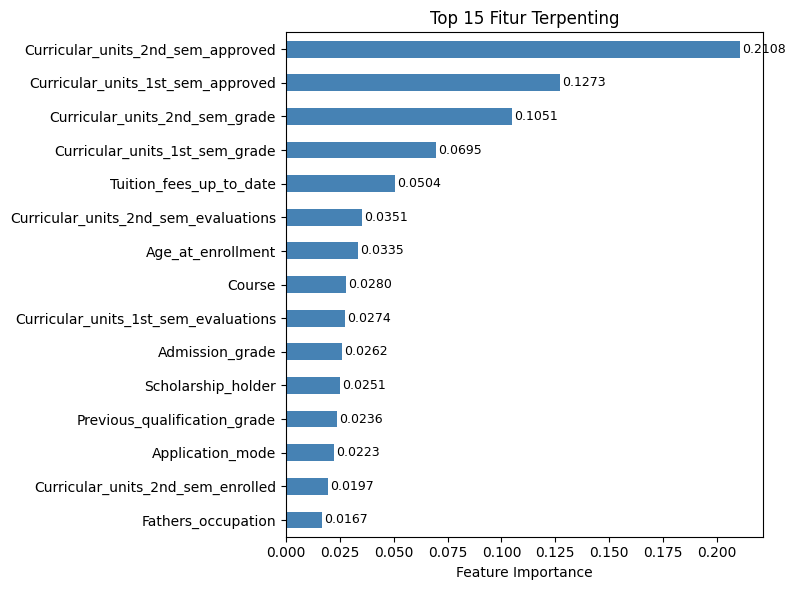

In [21]:
# Top 15 fitur paling penting
top_k = 15

# Mengambil dan menyortir fitur berdasarkan importance
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(top_k)

# Tampilkan daftar fitur penting
plt.figure(figsize=(8, 6))
ax = top_features.plot(kind='barh', color='steelblue')
plt.title(f"Top {top_k} Fitur Terpenting")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")

# Menambahkan nilai importance di setiap bar
for i, (feature, importance) in enumerate(top_features.items()):
    ax.text(importance + 0.001, i, f"{importance:.4f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [22]:
# Buat subset data training dan testing berdasarkan fitur penting
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

In [23]:
X_train_top = X_train_resampled_df[top_features.index]
X_test_top = X_test_scaled_df[top_features.index]

In [24]:
# Inisialisasi dan latih ulang model

# Definisikan ulang grid hyperparameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Inisialisasi dan jalankan Grid Search
model = RandomForestClassifier(random_state=42)
grid_search_top = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Fit model ke data oversampled dengan fitur terbatas
grid_search_top.fit(X_train_top, y_train_resampled)

# Gunakan model terbaik
best_model_top = grid_search_top.best_estimator_

# Prediksi
y_pred_top = best_model_top.predict(X_test_top)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [25]:
# Evaluasi model dengan fitur penting
print("Best Parameters:\n", grid_search.best_params_)
print("\nClassification Report (Top Fitur):")
print(classification_report(y_test, y_pred_top))

Best Parameters:
 {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report (Top Fitur):
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       426
           1       0.90      0.96      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.90      0.90      1089
weighted avg       0.91      0.91      0.91      1089



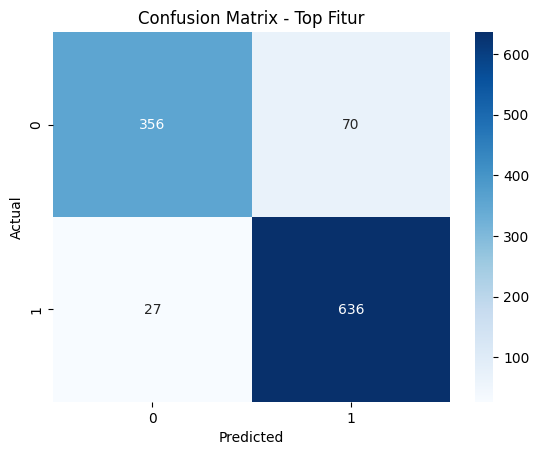

In [26]:
# Visualisasi Confusion Matrix Top Features
sns.heatmap(confusion_matrix(y_test, y_pred_top), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Top Fitur")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
# Accuracy score Top Features
acc_top = accuracy_score(y_test, y_pred_top)
print(f"Accuracy Score (top {top_k} fitur): {acc_top:.4f}")

Accuracy Score (top 15 fitur): 0.9109


In [28]:
# Simpan model ke file
dump(best_model_top, 'model_students-performance-15features.joblib')

['model_students-performance-15features.joblib']

### KESIMPULAN

Dalam proyek ini, dilakukan proses end-to-end untuk membangun model prediksi apakah mahasiswa akan dropout atau graduate, dengan fokus khusus pada mahasiswa yang masih berstatus "enrolled". Berikut adalah ringkasan kesimpulan:

1. Tujuan Proyek:
 - Memprediksi kemungkinan status akhir mahasiswa yang saat ini masih aktif (enrolled), apakah mereka akan lulus (graduate) atau keluar (dropout).

2. Preprocessing & Pemisahan Data:
  - Data dibersihkan, dikodekan, dan diskalakan.
  - Hanya mahasiswa yang sudah dropout atau graduate digunakan sebagai data training.
  - Mahasiswa yang enrolled disimpan terpisah sebagai data yang akan diprediksi.

3. Penanganan Kelas Imbalance:
  - Dilakukan oversampling (SMOTE) untuk menyeimbangkan jumlah data antara kelas dropout dan graduate dalam data training.

4. Modeling:
  - Model Random Forest digunakan sebagai model utama.
  - Hyperparameter tuning dilakukan menggunakan GridSearchCV untuk mendapatkan performa optimal.
  - Akurasi model pada data uji mencapai sekitar 90%, dengan performa yang seimbang antar kelas.

5. Prediksi Mahasiswa Aktif:
  - Model digunakan untuk memprediksi mahasiswa yang masih enrolled.
  - Output prediksi memberikan klasifikasi apakah mahasiswa aktif cenderung dropout (0) atau graduate (1), yang dapat digunakan untuk intervensi lebih lanjut.

6. Feature Importance:
  - Meskipun dilakukan analisis terhadap seluruh fitur, model akhir hanya menggunakan 15 fitur terpenting. Hal ini dilakukan untuk meningkatkan kemudahan penggunaan model dalam skenario nyata. Dengan mengurangi jumlah fitur input yang dibutuhkan, interaksi dengan model menjadi lebih sederhana dan efisien tanpa mengorbankan performa secara signifikan.
  - Berdasarkan hasil evaluasi, model dengan 15 fitur terpenting menghasilkan akurasi dan skor F1 yang hampir setara dengan model yang menggunakan semua fitur. Akurasi keduanya tetap pada 91%, dengan model top-fitur bahkan menunjukkan peningkatan kecil pada macro average precision dan recall. Ini menunjukkan bahwa fitur-fitur terpenting telah mampu merepresentasikan informasi yang relevan secara efektif, sehingga model tetap andal meski dengan input yang lebih sedikit.



#### GENERATE `requirements.txt`

In [29]:
import pkg_resources

# Daftar package yang digunakan
packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "imbalanced-learn",
    "joblib"
]

# Buat file requirements.txt
with open("requirements.txt", "w") as f:
    for pkg in packages:
        try:
            version = pkg_resources.get_distribution(pkg).version
            f.write(f"{pkg}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"Package '{pkg}' tidak ditemukan.")

# Tampilkan isi file
!cat requirements.txt

pandas==2.2.2
numpy==2.0.2
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1
imbalanced-learn==0.13.0
joblib==1.5.0


In [30]:
from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>